## Apply forecasting methods on the dataset(s) created. Make sure to preprocess adequately the time series according to the method used (e.g., an exponential smoothing or an autoregression), indeed checking stationarity and reducing trends and seasonality or with the help of a statistically significant test;

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv("/Users/marco/Desktop/DataMining2Project-master-2/dataset_train+test2.csv") #sostituisci con tuo percorso
#dateparse = lambda dates: pd.to_datetime(df['date'])

#df_ts = pd.read_csv("/Users/marco/Desktop/DataMining2Project-master-2/dataset_train+test2.csv",
 #                parse_dates=True, index_col='date', date_parser=dateparse)

In [8]:
df.head()

,date,Temperature,Humidity,Light,CO2,Occupancy,Ora,day,hour,absH,weekend,out_of_turn
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,1,2,4,17:51:00,17,0.0,1.0
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,1,2,4,17:51:59,17,0.0,1.0
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,1,2,4,17:53:00,17,0.0,1.0
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,1,2,4,17:54:00,17,0.0,1.0
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,1,2,4,17:55:00,17,0.0,1.0


In [10]:
df = df[['date', 'Temperature']]
#thur1 = thur1[['date', 'Temperature']]
#thur1.reset_index(inplace=False)
#thur1.head()
#ts = thur1.Temperature
#plt.plot(ts)
#plt.show()

In [12]:
df.to_csv('/Users/marco/Desktop/DataMining2Project-master-2/Temperature_ts_dataset.csv')

In [13]:
df = pd.read_csv("/Users/marco/Desktop/DataMining2Project-master-2/Temperature_ts_dataset.csv") #sostituisci con tuo percorso
dateparse = lambda dates: pd.to_datetime(df['date'])

df_ts = pd.read_csv("/Users/marco/Desktop/DataMining2Project-master-2/Temperature_ts_dataset.csv",
                 parse_dates=True, index_col='date', date_parser=dateparse)

In [14]:
del df_ts['Unnamed: 0']

In [15]:
df_ts.head()

,Temperature
date,
2015-02-04 17:51:00,23.18
2015-02-04 17:51:59,23.15
2015-02-04 17:53:00,23.15
2015-02-04 17:54:00,23.15
2015-02-04 17:55:00,23.10


In [16]:
type(df_ts)

pandas.core.frame.DataFrame

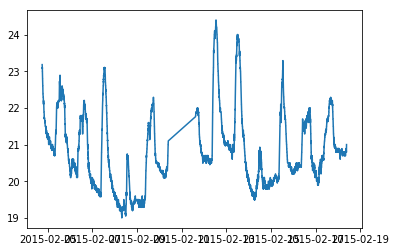

In [17]:
ts = df_ts['Temperature']
plt.plot(ts)

In [18]:
ts.index

DatetimeIndex(['2015-02-04 17:51:00', '2015-02-04 17:51:59',
               '2015-02-04 17:53:00', '2015-02-04 17:54:00',
               '2015-02-04 17:55:00', '2015-02-04 17:55:59',
               '2015-02-04 17:57:00', '2015-02-04 17:57:59',
               '2015-02-04 17:58:59', '2015-02-04 18:00:00',
               ...
               '2015-02-18 09:10:00', '2015-02-18 09:10:59',
               '2015-02-18 09:11:59', '2015-02-18 09:13:00',
               '2015-02-18 09:14:00', '2015-02-18 09:15:00',
               '2015-02-18 09:16:00', '2015-02-18 09:16:59',
               '2015-02-18 09:17:59', '2015-02-18 09:19:00'],
              dtype='datetime64[ns]', name='date', length=17895, freq=None)

In [19]:
index = pd.date_range(start=ts.index[0], end=ts.index[len(ts)-1], freq='D')
index

DatetimeIndex(['2015-02-04 17:51:00', '2015-02-05 17:51:00',
               '2015-02-06 17:51:00', '2015-02-07 17:51:00',
               '2015-02-08 17:51:00', '2015-02-09 17:51:00',
               '2015-02-10 17:51:00', '2015-02-11 17:51:00',
               '2015-02-12 17:51:00', '2015-02-13 17:51:00',
               '2015-02-14 17:51:00', '2015-02-15 17:51:00',
               '2015-02-16 17:51:00', '2015-02-17 17:51:00'],
              dtype='datetime64[ns]', freq='D')

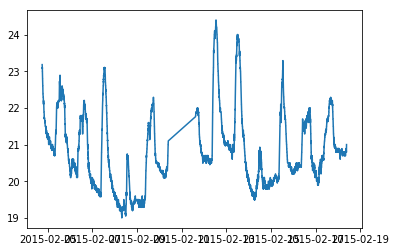

In [20]:
plt.plot(ts)

### Log transformation

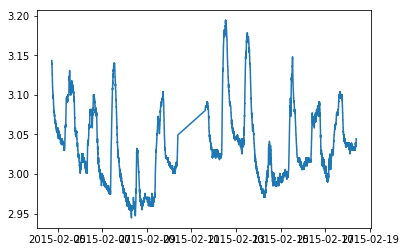

In [21]:
ts_log = pd.Series(np.log(ts), index=ts.index)
plt.plot(ts_log)
plt.show()

### Diff Tranformation

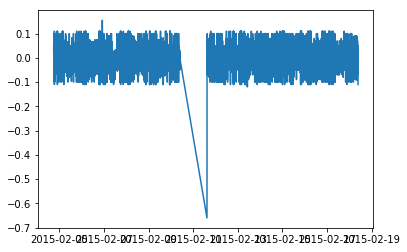

In [22]:
ts_diff = pd.Series(ts[:-1].values - ts[1:].values, index=ts.index[1:])
plt.plot(ts_diff)
plt.show()

#in pratica sottrae da ogni valore il valore precedente. viene na cagata :/
# l'unica cosa buona che fa è che rimuove il trend

### Log Mean Diff Tranformation

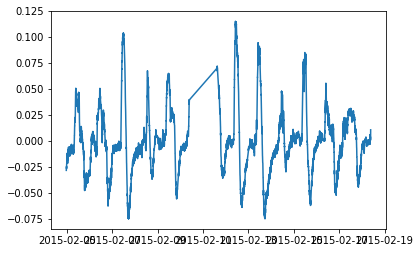

In [24]:
window = 24*14
ts_log_mov_diff = pd.Series(ts_log - ts_log.rolling(window, center=False).mean(), index=ts.index)
plt.plot(ts_log_mov_diff)
plt.show()

### Autocorrelation and Partial Autocorrelation

In [25]:
from statsmodels.tsa.stattools import acf, pacf

/Users/marco/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
lag_acf = acf(ts, nlags=15)
lag_pacf = pacf(ts, nlags=15, method='ols')

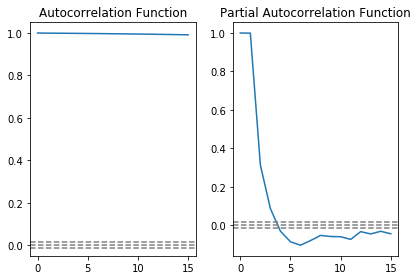

In [36]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [57]:
ts_log_mov_diff[:336]

date
2015-02-04 17:51:00         NaN
2015-02-04 17:51:59         NaN
2015-02-04 17:53:00         NaN
2015-02-04 17:54:00         NaN
2015-02-04 17:55:00         NaN
                         ...   
2015-02-04 23:22:00         NaN
2015-02-04 23:23:00         NaN
2015-02-04 23:23:59         NaN
2015-02-04 23:25:00         NaN
2015-02-04 23:25:59   -0.028548
Name: Temperature, Length: 336, dtype: float64

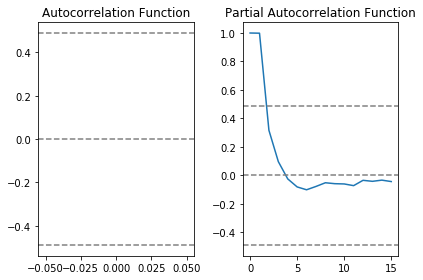

In [58]:
lag_acf = acf(ts_log_mov_diff.values[:336], nlags=15)
lag_pacf = pacf(ts_log_mov_diff[336:], nlags=15, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_acf)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(lag_pacf)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

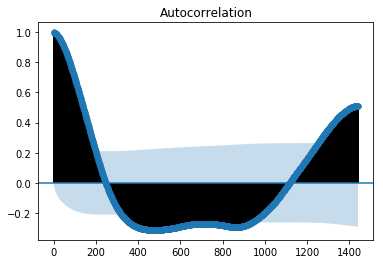

In [66]:
plot_acf(ts_log_mov_diff.values[336:], lags=1440)
plt.show()

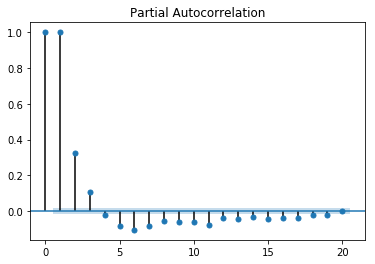

In [68]:
plot_pacf(ts_log_mov_diff.values[336:], lags=20)
plt.show()

In [69]:
from statsmodels.tsa.stattools import adfuller

In [70]:
dftest = adfuller(ts, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                    -4.377961
p-value                            0.000325
#Lags Used                        42.000000
Number of Observations Used    17852.000000
Critical Value (1%)               -3.430716
Critical Value (5%)               -2.861702
Critical Value (10%)              -2.566856
dtype: float64


In [71]:
dftest = adfuller(ts_log, autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                    -4.288420
p-value                            0.000465
#Lags Used                        42.000000
Number of Observations Used    17852.000000
Critical Value (1%)               -3.430716
Critical Value (5%)               -2.861702
Critical Value (10%)              -2.566856
dtype: float64


In [73]:
dftest = adfuller(ts_log_mov_diff.values[336:], autolag='AIC')

print('Results of Dickey-Fuller Test:')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.256259e+00
p-value                        4.331574e-08
#Lags Used                     3.800000e+01
Number of Observations Used    1.752000e+04
Critical Value (1%)           -3.430723e+00
Critical Value (5%)           -2.861705e+00
Critical Value (10%)          -2.566858e+00
dtype: float64


In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [75]:
result = seasonal_decompose(ts, model='additive', freq=14)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

date
2015-02-04 17:51:00   NaN
2015-02-04 17:51:59   NaN
2015-02-04 17:53:00   NaN
2015-02-04 17:54:00   NaN
2015-02-04 17:55:00   NaN
                       ..
2015-02-18 09:15:00   NaN
2015-02-18 09:16:00   NaN
2015-02-18 09:16:59   NaN
2015-02-18 09:17:59   NaN
2015-02-18 09:19:00   NaN
Name: Temperature, Length: 17895, dtype: float64
date
2015-02-04 17:51:00    0.000528
2015-02-04 17:51:59    0.000562
2015-02-04 17:53:00   -0.001549
2015-02-04 17:54:00    0.000601
2015-02-04 17:55:00    0.000249
                         ...   
2015-02-18 09:15:00    0.000088
2015-02-18 09:16:00   -0.000056
2015-02-18 09:16:59    0.000528
2015-02-18 09:17:59    0.000562
2015-02-18 09:19:00   -0.001549
Name: Temperature, Length: 17895, dtype: float64
date
2015-02-04 17:51:00   NaN
2015-02-04 17:51:59   NaN
2015-02-04 17:53:00   NaN
2015-02-04 17:54:00   NaN
2015-02-04 17:55:00   NaN
                       ..
2015-02-18 09:15:00   NaN
2015-02-18 09:16:00   NaN
2015-02-18 09:16:59   NaN
2015-02-18 09:1

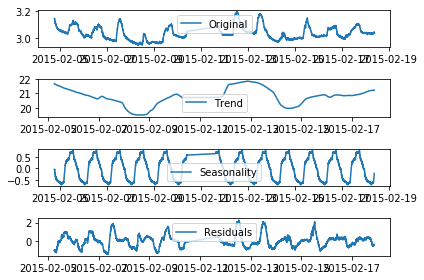

In [77]:
decomposition = seasonal_decompose(df_ts, freq=1440)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [78]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [79]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error


def r2_score(y_true, y_pred, ts):
    mu = np.mean(ts)
    total = np.sum((y_true - mu) ** 2)
    residuals = np.sum((y_true - y_pred) ** 2)
    return 1 - (residuals / total)


def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred, ts):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred, ts),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

In [81]:
split_index = 12600
train, test = ts.iloc[:split_index], ts.iloc[split_index:]

In [82]:
ts.iloc[split_index:]

date
2015-02-14 17:05:00    20.00
2015-02-14 17:06:00    20.00
2015-02-14 17:06:59    20.00
2015-02-14 17:08:00    20.00
2015-02-14 17:09:00    20.00
                       ...  
2015-02-18 09:15:00    20.82
2015-02-18 09:16:00    20.86
2015-02-18 09:16:59    20.89
2015-02-18 09:17:59    20.89
2015-02-18 09:19:00    21.00
Name: Temperature, Length: 5295, dtype: float64

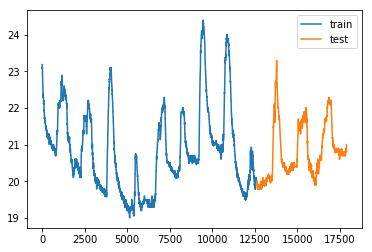

In [83]:
plt.plot(range(split_index), train, label='train')
plt.plot(range(split_index, len(ts)), test, label='test')
plt.legend()
plt.show()

In [84]:
len(ts)

17895

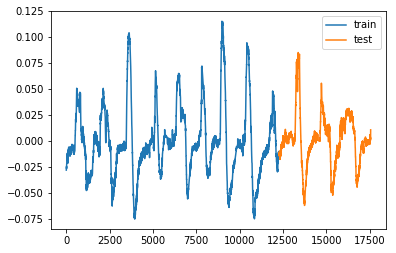

In [89]:
split_index = 12600
train, test = ts_log_mov_diff.iloc[336:split_index], ts_log_mov_diff.iloc[split_index:]

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.legend()
plt.show()

In [90]:
test.index[0]

Timestamp('2015-02-14 17:05:00')

/Users/marco/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/marco/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


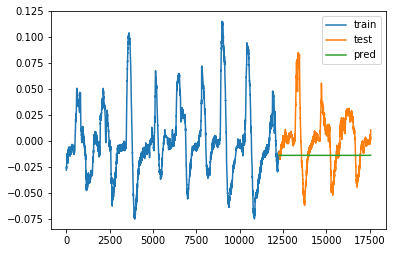

In [91]:
smoothing_level = 0.1
ses = SimpleExpSmoothing(train).fit(smoothing_level=smoothing_level, optimized=True)
pred = ses.predict(start=len(train), end=len(train)+(len(test)-1))

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

In [92]:
for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

MAE 0.023
RMSE 0.029
MAD 0.018
R2 1.000
MAPE nan
MAXAPE nan
TAPE 0.000


/Users/marco/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3331: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


In [93]:
evaluate(test, pred, ts_log_mov_diff).items()

/Users/marco/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3331: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


dict_items([('MAE', 0.02306044137814581), ('RMSE', 0.029213928021986867), ('MAD', 0.018214954570395955), ('R2', 1.0), ('MAPE', nan), ('MAXAPE', nan), ('TAPE', 0.0)])

/Users/marco/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/marco/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


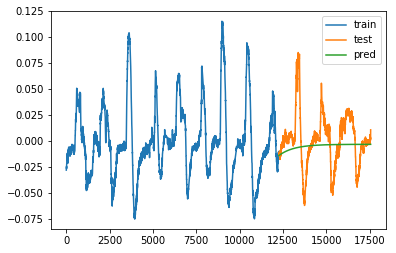

MAE 0.019
RMSE 0.026
MAD 0.013
R2 1.000
MAPE nan
MAXAPE nan
TAPE 0.000


/Users/marco/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3331: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


In [94]:
arima = ARIMA(train, order=(1,0,0)).fit()
pred = arima.predict(start=len(train), end=len(train)+(len(test)-1))

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

/Users/marco/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/marco/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/marco/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


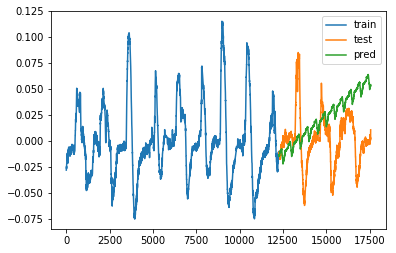

MAE 0.032
RMSE 0.040
MAD 0.021
R2 1.000
MAPE nan
MAXAPE nan
TAPE 0.000


/Users/marco/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3331: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


In [100]:
seasonal_periods=500

es = ExponentialSmoothing(train, seasonal_periods=seasonal_periods, trend='add', seasonal='add').fit()
pred = es.predict(start=len(train), end=len(train)+(len(test)-1))

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

/Users/marco/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/marco/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/marco/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


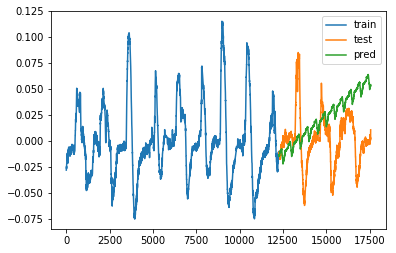

MAE 0.032
RMSE 0.040
MAD 0.021
R2 1.000
MAPE nan
MAXAPE nan
TAPE 0.000


/Users/marco/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3331: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects
  join_index = self.union(other)


In [101]:
sarimax = SARIMAX(train, order=(1,0,0), seasonal_order=(12, 1, 0, 1)).fit(disp=False)
pred = es.predict(start=len(train), end=len(train)+(len(test)-1))

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train), len(train)+len(test)), test, label='test')
plt.plot(range(len(train), len(train)+len(pred)), pred, label='pred')
plt.legend()
plt.show()

for k, v in evaluate(test, pred, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

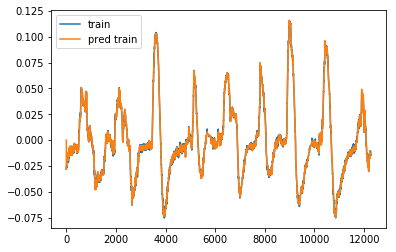

MAE 0.001
RMSE 0.002
MAD 0.001
R2 0.998
MAPE inf
MAXAPE inf
TAPE inf


In [102]:
pred_train = sarimax.predict(start=train.index[0], end=train.index[-1])

plt.plot(range(len(train)), train, label='train')
plt.plot(range(len(train)), pred_train, label='pred train')
plt.legend()
plt.show()

for k, v in evaluate(train, pred_train, ts_log_mov_diff).items():
    print('%s %.3f' % (k, v))

In [103]:
print(sarimax.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        Temperature   No. Observations:                12264
Model:             SARIMAX(1, 0, 0)x(12, 1, 0, 1)   Log Likelihood               61780.796
Date:                            Wed, 20 May 2020   AIC                        -123533.591
Time:                                    10:08:49   BIC                        -123429.790
Sample:                                         0   HQIC                       -123498.808
                                          - 12264                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3100      0.002   -145.059      0.000      -0.314      -0.306
ar.S.L1       -0.3766      0.002   